<a href="https://colab.research.google.com/github/tintenderete/TFM-Algoritmo-con-redes-evolutivas/blob/main/revision_evolutivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
import tensorflow as tf

from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape 
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten


from keras.callbacks import EarlyStopping


In [ ]:

# Parámetros
num_dias = 10
num_periodos = 60
num_activos = 5
num_canales = 1

# Crear datos aleatorios para X
X = np.random.uniform(low=-1, high=1, size=(num_dias, num_periodos, num_activos, num_canales))

# Aplicar las transformaciones a los activos 1 y 2
X[:, :, 0, 0] *= 2  # Multiplicar los precios del canal 1 del activo 1 por 2
X[:, :, 1, 0] /= 2  # Dividir los precios del canal 1 del activo 2 entre 2

# Crear la etiqueta Y como el cumsum del canal 1
Y = np.sum(X[:, :, :, 0], axis=1)


In [ ]:
X.shape, Y.shape

((10, 60, 5, 1), (10, 5))

# Funcion listas

In [ ]:
def get_ranking(Y):
  Y_ranking = np.zeros_like(Y, dtype=int)

  for i in range(Y.shape[0]):
      Y_ranking[i] = np.argsort(np.argsort(-Y[i]))

  return Y_ranking

In [ ]:
Y[0:4],get_ranking(Y[0:4])

(array([[ 0.38625446,  6.72660333, -7.27867277, -1.8617636 ,  0.14659732],
        [-3.91271031,  2.10250407, -0.680511  , -6.5133519 , -5.76407696],
        [17.8456445 , -2.53888031, -5.05405159,  2.01629235, 10.96516085],
        [-0.30706266, -1.62151301,  0.03026639, -2.03371343, -2.01291247]]),
 array([[1, 0, 4, 3, 2],
        [2, 0, 1, 4, 3],
        [0, 3, 4, 2, 1],
        [1, 2, 0, 4, 3]]))

# GeneticAlgorithm

In [ ]:
class GeneticAlgorithm:
    def __init__(self, 
                 initial_population, 
                 fitness_function, 
                 selection_function, 
                 crossover_function, 
                 mutation_function, 
                 immigration_function,  
                 n_generations,
                 n_save_best_population):
        self.population = initial_population
        self.fitness_function = fitness_function
        self.selection_function = selection_function
        self.crossover_function = crossover_function
        self.mutation_function = mutation_function
        self.immigration_function = immigration_function 
        self.n_generations = n_generations
        self.n_save_best_population = n_save_best_population

    def run(self):
        for i in range(self.n_generations):
            fitness = self.fitness_function(self.population)
            best_population = self._get_best_population(self.population,  fitness)
            parents = self.selection_function(self.population, fitness)
            offspring = self.crossover_function(parents)
            offspring = self.mutation_function(offspring)
            self.population = np.concatenate((parents, offspring))

            immigration = self.immigration_function()  
            self.population = np.concatenate((self.population, immigration))

            if(len(best_population)>0):
              self.population = np.concatenate((self.population, best_population))


            # STATS

            print("GENERATION: " + str(i))
            print("Fitness: ")
            print(fitness)

        # Devuelve la mejor solución encontrada
        fitness = self.fitness_function(self.population)
        best_idx = np.argmax(fitness)
        return self.population[best_idx]

    def _get_best_population(self,population,  fitness):
      idx_best_pop = np.argsort(fitness)[::1][:self.n_save_best_population]

      return np.array(population)[idx_best_pop]


In [ ]:
pop = [[1,1],[2,2],[10,10],[11,11],[20,20],[30,30],[40,40] ]
fitness = np.array([1,2,10,11, 20,0,40])

In [ ]:
geneticAlgorithm = GeneticAlgorithm(1,2,3,4,5,6,7,n_save_best_population = 3)

In [ ]:
geneticAlgorithm._get_best_population(pop,fitness)

array([[30, 30],
       [ 1,  1],
       [ 2,  2]])

# initial_population

In [ ]:
ind_A = [
    # numero_de_layers_densas1
    # numero_de_units1
    # activation1
    # numero_de_layers_densas2
    # numero_de_units2 
    # activation2
    # output_activation
]

def get_ind_A():
  ind_A = [
      np.random.randint(1,10),
      np.random.randint(1,10) * 20,
      np.random.choice(['relu','linear']),
      np.random.randint(1,10),
      np.random.randint(1,10) * 20,
      np.random.choice(['relu','linear']),
      np.random.choice(['linear'])   
  ]
  return ind_A

In [ ]:
for i in range(10):
  print(get_ind_A())

[4, 180, 'linear', 2, 160, 'linear', 'linear']
[2, 60, 'linear', 4, 60, 'linear', 'linear']
[3, 140, 'relu', 5, 160, 'linear', 'linear']
[4, 160, 'relu', 5, 80, 'linear', 'linear']
[2, 40, 'linear', 1, 20, 'relu', 'linear']
[7, 140, 'relu', 1, 140, 'linear', 'linear']
[9, 180, 'linear', 9, 100, 'relu', 'linear']
[9, 180, 'linear', 1, 160, 'relu', 'linear']
[7, 100, 'relu', 9, 120, 'relu', 'linear']
[7, 140, 'relu', 8, 60, 'linear', 'linear']


## gen_population

In [ ]:
def gen_population(n_pop = 50):
  pop = []
  for p in range(n_pop):
    pop.append(get_ind_A())
  return np.array(pop, dtype=object)

In [ ]:
gen_population(n_pop = 3)

array([[5, 20, 'relu', 2, 100, 'linear', 'linear'],
       [2, 120, 'relu', 3, 60, 'linear', 'linear'],
       [6, 40, 'linear', 1, 140, 'linear', 'linear']], dtype=object)

## create_model

In [ ]:
def create_model(iput_shape, output_shape, ind_gens, learning_rate=0.001):

  numero_de_layers_densas1 = ind_gens[0]
  numero_de_units1= ind_gens[1]
  activation1= ind_gens[2]
  numero_de_layers_densas2= ind_gens[3]
  numero_de_units2 = ind_gens[4]
  activation2= ind_gens[5]
  output_activation = ind_gens[6]

  inputs = keras.Input(shape=(iput_shape))
  m = inputs

  for i in range(numero_de_layers_densas1):
    m = Dense( units=numero_de_units1 , activation=activation1 )(m)

  for i in range(numero_de_layers_densas2): 
    m = Dense( units=numero_de_units2 , activation=activation2 )(m)

  m = Flatten()(m)
  outputs = Dense(output_shape, activation = output_activation)(m)
  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(
      loss='mse',
      optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
      metrics=[],
    )

  return model


In [ ]:
create_model(iput_shape = (35, 3), output_shape =  (35), ind_gens = [2, 40, 'relu', 2, 20, 'linear', 'relu']).summary()

Model: "model_351"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_353 (InputLayer)      [(None, 35, 3)]           0         
                                                                 
 dense_3912 (Dense)          (None, 35, 40)            160       
                                                                 
 dense_3913 (Dense)          (None, 35, 40)            1640      
                                                                 
 dense_3914 (Dense)          (None, 35, 20)            820       
                                                                 
 dense_3915 (Dense)          (None, 35, 20)            420       
                                                                 
 flatten_351 (Flatten)       (None, 700)               0         
                                                                 
 dense_3916 (Dense)          (None, 35)                24

## mse

In [ ]:
Y.shape

(10, 5)

In [ ]:
tf.keras.metrics.mean_squared_error(
    Y[0], Y[0]
)

<tf.Tensor: shape=(), dtype=float64, numpy=0.0>

In [ ]:
tf.keras.metrics.mean_squared_error(
    [4,5], [4,5]
)

<tf.Tensor: shape=(), dtype=int32, numpy=0>

In [ ]:
tf.keras.metrics.mean_squared_error(
    [4,5], [17,4]
)

<tf.Tensor: shape=(), dtype=int32, numpy=85>

In [ ]:
tf.keras.metrics.mean_squared_error(
    [4,5], [-17,4]
)

<tf.Tensor: shape=(), dtype=int32, numpy=221>

## model_population

In [ ]:
def model_population(iput_shape, output_shape,populations_gens, learning_rate):
  pop = []
  for i in range(len(populations_gens)):

    pop.append( create_model(iput_shape, output_shape, populations_gens[i], learning_rate) )

  return pop


In [ ]:
pop = [[3, 100, 'linear', 3, 120, 'relu', 'relu'],
 [7, 80, 'relu', 6, 160, 'linear', 'relu'],
 [4, 100, 'relu', 3, 100, 'linear', 'relu']]

In [ ]:
models_pop = model_population((35,3), (35),pop, 0.01)

In [ ]:
models_pop

In [ ]:
for m in models_pop:
  print(m.summary())

Model: "model_352"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_354 (InputLayer)      [(None, 35, 3)]           0         
                                                                 
 dense_3917 (Dense)          (None, 35, 100)           400       
                                                                 
 dense_3918 (Dense)          (None, 35, 100)           10100     
                                                                 
 dense_3919 (Dense)          (None, 35, 100)           10100     
                                                                 
 dense_3920 (Dense)          (None, 35, 120)           12120     
                                                                 
 dense_3921 (Dense)          (None, 35, 120)           14520     
                                                                 
 dense_3922 (Dense)          (None, 35, 120)           14

# Fitness_function

In [ ]:
class Fitness_function_keras():
  def __init__(self, X, Y, epochs, batch_size, learning_rate):
    self.X = X
    self.Y = Y
    self.epochs = epochs
    self.batch_size = batch_size
    self.learning_rate = learning_rate

    self.last_loss_history = []

  def run(self, gens_population ):
    return self.fitness_keras(self.X, self.Y, gens_population , self.epochs, self.batch_size)

  def fitness_keras(self, X, Y, gens_population , epochs, batch_size):

    self.last_loss_history = []

    population_models = model_population(X.shape[1:], Y.shape[1], gens_population, self.learning_rate)

    fitness = []

    for m in population_models:

      h = m.fit(X,Y, 
                  epochs=epochs, 
                  batch_size = batch_size, 
                  verbose=0,
                  callbacks=[EarlyStopping(monitor='loss', patience=10, min_delta=0)]) 

      self.last_loss_history.append(h.history["loss"])
      fitness.append(h.history["loss"][-1])

    return np.array(fitness)

In [ ]:
pop = [[3, 100, 'linear', 3, 120, 'relu', 'relu'],
 [7, 80, 'relu', 6, 160, 'linear', 'relu'],
 [4, 100, 'relu', 3, 100, 'linear', 'relu']]

fitness_function_keras = Fitness_function_keras(X, Y , epochs = 2, batch_size = 1, learning_rate = 0.1)

fitness = fitness_function_keras.run(pop)
print(fitness)

[2.63925724e+01 1.20295981e+15 8.05240900e+06]


# Selection_function

In [ ]:
class Selection_function():
  def __init__(self, number_of_couples = 1, tournament_size = 3):
    self.number_of_couples = number_of_couples
    self.tournament_size = tournament_size
  
  def tournament_selection(self, population, fitness):
    all_parents = []
    for i in range(self.number_of_couples):
      idx = np.random.choice(np.arange(len(population)), size=self.tournament_size, replace=False)
      orden = np.argsort(fitness[idx])
      best_individual_idx = idx[orden[0:2]]
      all_parents.append(population[best_individual_idx[0]])
      all_parents.append(population[best_individual_idx[1]])
    return all_parents


In [ ]:
pop = np.array([[3, 100, 'linear', 3, 120, 'relu', 'relu'],
 [7, 80, 'relu', 6, 160, 'linear', 'relu'],
 [4, 100, 'relu', 3, 100, 'linear', 'relu']])
fitness = np.array([28.697153091430664, 28.697154998779297, 28.697158813476562])

selection = Selection_function(number_of_couples = 10)

parents = selection.tournament_selection(pop, fitness)

print( parents )

[array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'linear', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'linear', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'linear', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'linear', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'linear', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'linear', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'linear', 'relu'],

In [ ]:
# los dos primeros padres
parents[0], parents[1]

(array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'),
 array(['7', '80', 'relu', '6', '160', 'linear', 'relu'], dtype='<U21'))

# Crossover_function

In [ ]:
def uniform_crossover(parent1, parent2):
    child1, child2 = parent1.copy(), parent2.copy()
    for i in range(len(parent1)):
        if np.random.uniform(0, 1) < 0.5:  # Choose randomly
            child1[i], child2[i] = child2[i], child1[i]  # Swap elements
    return child1, child2

In [ ]:
def easy_crossover(parents):
  offspring = []
  for i in range(0, len(parents), 2):

    parent1 = parents[i]
    parent2 = parents[i+1]

    childs = uniform_crossover(parent1, parent2 )
    
    offspring.append(childs[0])
    offspring.append(childs[1])

  return offspring

In [ ]:
ofs = easy_crossover(parents)
print(ofs)

[array(['3', '100', 'linear', '3', '120', 'linear', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'relu', 'relu'], dtype='<U21'), array(['7', '100', 'relu', '6', '160', 'relu', 'relu'], dtype='<U21'), array(['3', '80', 'linear', '3', '120', 'linear', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '6', '160', 'linear', 'relu'], dtype='<U21'), array(['7', '100', 'relu', '3', '160', 'linear', 'relu'], dtype='<U21'), array(['3', '80', 'linear', '6', '120', 'relu', 'relu'], dtype='<U21'), array(['3', '100', 'linear', '6', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '80', 'relu', '3', '160', 'linear', 'relu'], dtype='<U21'), array(['3', '80', 'linear', '6', '160', 'linear', 'relu'], dtype='<U21'), array(['7', '100', 'relu', '3', '120', 'relu', 'relu'], dtype='<U21'), array(['7', '100', 'relu', '6', '120', 'linear', 'relu'], dtype='<U21'), array(['3', '80', 'linear', '3', '160', 'relu', 'relu'],

In [ ]:
# primer hijo
ofs[0]

array(['3', '100', 'linear', '3', '120', 'linear', 'relu'], dtype='<U21')

# mutation_function

In [ ]:
def mutation(offspring):
  return offspring

# genetico y funciones TEST

In [ ]:
geneticAlgorithm = GeneticAlgorithm(1,2,3,4,5,6,7,n_save_best_population = 3)
initial_population = gen_population(n_pop = 50)
fitness_function_keras = Fitness_function_keras(X, Y , epochs = 100, batch_size = 2, learning_rate = 0.01)
selection = Selection_function(number_of_couples = 10 )
n_immigration_function = 30

In [ ]:
#print("---- initial_population ----")
population = initial_population
#print(population)
#print(len(population))

for i in range(10):
  print("||||||| GEN: " + str(i) + " ||||||||")

  

  #print("---- fitness ----")
  fitness = fitness_function_keras.run(population)
  #print(fitness)
  #print(len(fitness))

  best_idx = np.argmin(fitness)

  best_fitness = fitness[best_idx]
  print("best fitness: " + str(best_fitness))

  if best_fitness < 0.1:
    print("best_model: " )
    print(population[best_idx])
    print("ENTRENAMIENTO TERMINADO")
    break

  #print("---- best_population ----")
  best_population = geneticAlgorithm._get_best_population(population,fitness)
  print(best_population)
  #print(len(best_population))

  #print("---- parents ----")
  parents = selection.tournament_selection(population, fitness)
  #print(parents)
  #print(len(parents))

  #print("---- offspring crossover ----")
  offspring = easy_crossover(parents)
  #print(offspring)
  #print(len(offspring))

  #print("---- offspring mutation ----")
  offspring = mutation(offspring)
  #print(offspring)
  #print(len(offspring))

  #print("---- population ----")
  #population = np.concatenate((parents, offspring))
  #print(population)
  #print(len(population))

  #print("---- immigration ----")
  immigration = gen_population(n_pop = 2)
  #print(immigration)
  #print(len(immigration))

  #print("---- population + immigration ----")
  population = np.concatenate((population, immigration))
  #print(population)
  #print(len(population))

  #print("---- population + best_population ----")
  population = np.concatenate((population, best_population))
  #print(population)
  #print(len(population))



||||||| GEN: 0 ||||||||
best fitness: 1.1048502607594046e-13
best_model: 
[3 140 'linear' 3 40 'linear' 'linear']
ENTRENAMIENTO TERMINADO


In [ ]:
#bad_gen = initial_population[3]
bad_model = create_model(X.shape[1:], Y.shape[1],[3 ,140 ,'linear' ,3, 40, 'linear', 'linear'], learning_rate=0.01)
bad_model.summary()

Model: "model_815"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_819 (InputLayer)      [(None, 60, 5, 1)]        0         
                                                                 
 dense_8930 (Dense)          (None, 60, 5, 140)        280       
                                                                 
 dense_8931 (Dense)          (None, 60, 5, 140)        19740     
                                                                 
 dense_8932 (Dense)          (None, 60, 5, 140)        19740     
                                                                 
 dense_8933 (Dense)          (None, 60, 5, 40)         5640      
                                                                 
 dense_8934 (Dense)          (None, 60, 5, 40)         1640      
                                                                 
 dense_8935 (Dense)          (None, 60, 5, 40)         16

In [ ]:
bad_h = bad_model.fit(X,Y, 
                  epochs=100, 
                  batch_size = 2, 
                  verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 65.1737
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 319.7189
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 126.4436
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 575.8555
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 106.6437
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 66.3602
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 126.6811
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 49.0451
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 25.6737
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 20.3301
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 11.6698
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 6.8697
Epoch 13/100
5/5 [===========================

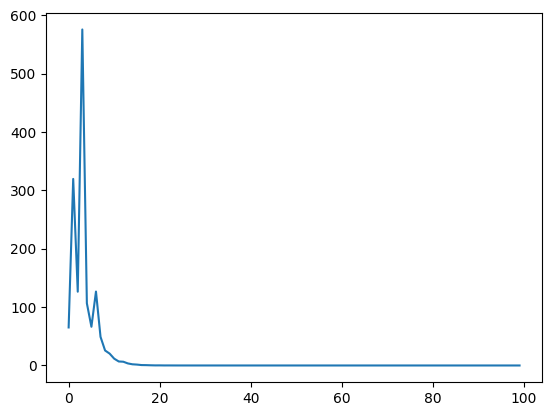

In [ ]:
plt.plot(bad_h.history['loss'])

In [ ]:
"""
initial_population = gen_population(n_pop = 4)
fitness_function_keras = Fitness_function_keras(X, Y , epochs = 1, batch_size = 1)
selection = Selection_function(number_of_couples = 1 )
n_immigration_function = 2

geneticAlgorithm = GeneticAlgorithm(
                 initial_population = initial_population, 
                 fitness_function = fitness_function_keras.run, 
                 selection_function = selection.tournament_selection, 
                 crossover_function = easy_crossover, # uniform_crossover
                 mutation_function = mutation, 
                 immigration_function = gen_population(n_pop = n_immigration_function),  
                 n_generations = 1,
                 n_save_best_population = 1
                 )

geneticAlgorithm.run()
"""